# Carbon Aware SDK Demo Notebook

This notebook is supposed to give you an introduction to using the Carbon Aware SDK, by interacting with it deployed as a Web API. For a guide on setting it up as a Web API, see the GettingStarted.md guide in the main repo of the project: https://github.com/Green-Software-Foundation/carbon-aware-sdk/blob/dev/GettingStarted.md

In [ ]:
# Get all regions to find worst possible region:

In [1]:
# Getting data with the Carbon Aware SDK
import time
import openapi_client
from pprint import pprint
from openapi_client.api import carbon_aware_api
from openapi_client.model.emissions_data import EmissionsData
from  dateutil.parser import parse
# Defining the host is optional and defaults to http://localhost
# See configuration.py for a list of all supported configuration parameters.
configuration = openapi_client.Configuration(
        host = "https://carbon-aware-sdk.azurewebsites.net"
        #host = "http://localhost:5073"
)


 
# Enter a context with an instance of the API client
with openapi_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    api_instance = carbon_aware_api.CarbonAwareApi(api_client)
    location = "westus" # str |  (optional)
    time = parse('2022-07-22T10:30:00.00Z') # datetime |  (optional)
    to_time = parse('2022-07-22T11:00:00.00Z') # datetime |  (optional)
    duration_minutes = 0 # int |  (optional) (default to 0)

    try:
        api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=time, to_time=to_time, duration_minutes=duration_minutes)

        pprint(api_response)
    except openapi_client.ApiException as e:
        print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)



[{'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 409.59391011,
 'time': datetime.datetime(2022, 7, 22, 11, 0, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 406.87235589,
 'time': datetime.datetime(2022, 7, 22, 10, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 406.87235589,
 'time': datetime.datetime(2022, 7, 22, 10, 50, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 406.87235589,
 'time': datetime.datetime(2022, 7, 22, 10, 45, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 406.87235589,
 'time': datetime.datetime(2022, 7, 22, 10, 40, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 406.87235589,
 'time': datetime.datetime(2022, 7, 22, 10, 35, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'CAISO_NORTH',
 'rating': 407.32594826,
 'time': datetime.datetime(2022, 7, 22, 10, 30, tzin

# By Making Applications Carbon Aware, we can decrease carbon footprint of software by up to 76%!
Based on example of moving from westcentralus to francecentral - times used for calculation:
- westcentralus: 2022-08-15 20:55
- francecentral: 2022-08-15 13:45

## Scenario:
A software engineer is running data processing job at 8:55 pm every day. The job is run in `westcentralus` Azure Data centre. He suspects that running the task at a different time of day, might produce less carbon emissions, since there is more solar energy in the grid during the day.
1. He wants to check, what is the current carbon intensity in that location.
2. He also would like to know, if it is better for the planet 🌍, to run this task at a different time of day.

He decides to use the Carbon Aware SDK to satisfy his curiosity, and possibly build a business case to move the job to another time, if his findings confirm his suspicions. He has cloned the [repository](https://github.com/Green-Software-Foundation/carbon-aware-sdk), and hosted it locally as a Web API on https://localhost:5073


1. He starts by running a query on the `/emissions/bylocation` endpoint of the Carbon Aware SDK, for the region `westcentralus` and time 8:55pm:

In [5]:
## Engineer's preperations:
# Getting data with the Carbon Aware SDK
import os
import pytz
import datetime
import openapi_client
from pprint import pprint
from openapi_client.api import carbon_aware_api
from openapi_client.model.emissions_data import EmissionsData
from  dateutil.parser import parse
from dotenv import load_dotenv

# Load env variables:
load_dotenv()
try:
    host_url = os.environ["SDK_WEB_HOST"]
except KeyError:
    print("SDK_WEB_HOST environment var not set, using localhost")
    host_url = "http://localhost:5073"
    
# Defining the host is optional and defaults to http://localhost
# See configuration.py for a list of all supported configuration parameters.
configuration = openapi_client.Configuration(
        host = host_url
)


Running the actual query, with parameters:
- location: `westcentralus`
- start_time: 2022-08-15 21:00
- end_time: 2022-08-15 20:55
- duration_minutes: 0

In [11]:
# Enter a context with an instance of the API client
with openapi_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    api_instance = carbon_aware_api.CarbonAwareApi(api_client)
    location = "westcentralus"               # str |  (required)
    start_time = parse('2022-08-15T21:00')   # datetime |  (optional)
    to_time = parse('2022-08-15T20:55')      # datetime |  (optional)
    duration_minutes = 0                     # int |  (optional) (default to 0)

    try:
        api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=start_time, to_time=to_time, duration_minutes=duration_minutes)

        pprint(api_response)
    except openapi_client.ApiException as e:
        print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 928.50358139,
 'time': datetime.datetime(2022, 8, 15, 20, 55, tzinfo=tzutc())}]


From the query above, the software engineer can see that the carbon intensity in `westcentralus` at 8:55pm is `928.5` grams CO2 per kWh. That's a lot!

He wonders whether running it at a different time of day might improve that value, so he makes a query to find the best time of day for running his job, by polling the `/emissions/bylocations/best` endpoint. (It will return a single location and time with the lowest carbon intensity in a given time window). He runs it, telling the SDK to look for best time between 12am on 15.08.2022 and 11:59pm on 15.08.2022.

parameters:
- locations: [`westcentralus`]
- start_time: 2022-08-15 00:00
- end_time: 2022-08-15 23:59
- duration_minutes: 0

In [37]:
# Enter a context with an instance of the API client
with openapi_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    api_instance = carbon_aware_api.CarbonAwareApi(api_client)
    locations = ["westcentralus"    ]        # List[str] |  (required)
    start_time = parse('2022-08-15T00:00')   # datetime |  (optional)
    to_time = parse('2022-08-15T20:55')      # datetime |  (optional)
    duration_minutes = 0                     # int |  (optional) (default to 0)

    try:
        api_response = api_instance.get_best_emissions_data_for_locations_by_time(location=locations, time=start_time, to_time=to_time, duration_minutes=duration_minutes)

        print("Best time for running the job")
        pprint(api_response)
    except openapi_client.ApiException as e:
        print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

Best time for running the job
{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())}


## Outcome of time shifting: Carbon footprint decrased by up to 47%!
Engineer's short experiment showed him that moving the job to a different time (In this case, 11:55 pm UTC), he can decrease the carbon emissions from `928.5` gram CO2 per kWh to `494.0`!

Below, we can see data for this region for past 30 days with the original and time shifted values of carbon emissions in `westcentralus`.

In [91]:
# Enter a context with an instance of the API client
with openapi_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    api_instance = carbon_aware_api.CarbonAwareApi(api_client)
    location = "westcentralus"               # str |  (required)
    start_time = parse('2022-07-17T00:05')   # datetime |  (optional)
    to_time = parse('2022-08-15T23:59')      # datetime |  (optional)
    duration_minutes = 0                     # int |  (optional) (default to 0)

    try:
        # Get last 30 days
        api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
        data_westcentralus = api_response[:]
        # Get 25 days before that
        start_time = parse('2022-06-22T00:05')   # datetime |  (optional)
        to_time = parse('2022-07-16T23:59')      # datetime |  (optional)       
        api_response = api_instance.get_emissions_data_for_location_by_time(location=location, time=start_time, to_time=to_time, duration_minutes=duration_minutes)
        data_westcentralus += api_response[:]
        pprint(api_response[:5])
        print("Number of days: ", len(data_westcentralus)/288) # 288 5 minute chunks in each 24h
    except openapi_client.ApiException as e:
        print("Exception when calling CarbonAwareApi->emissions_bylocation_get: %s\n" % e)

[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.50849856,
 'time': datetime.datetime(2022, 7, 16, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 418.21216514,
 'time': datetime.datetime(2022, 7, 16, 23, 50, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 615.52484609,
 'time': datetime.datetime(2022, 7, 16, 23, 45, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 583.31978782,
 'time': datetime.datetime(2022, 7, 16, 23, 40, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 603.73144447,
 'time': datetime.datetime(2022, 7, 16, 23, 35, tzinfo=tzutc())}]
Number of days:  55.0


Grouping the data:

In [111]:
data_8_55_westcentralus = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T20:55").strftime('%H:%M:%S'), data_westcentralus))
print("8:55 in west_centralus length: ", len(data_8_55_westcentralus))
pprint(data_8_55_westcentralus[:3])
data_11_55_westcentralus = list(filter(lambda x: x['time'].strftime('%H:%M:%S') == parse("2022-08-15T23:55").strftime('%H:%M:%S'), data_westcentralus))
print("8:55 in west_centralus length: ", len(data_11_55_westcentralus))
pprint(data_11_55_westcentralus[:3])

data_top_row_westcentralus = ["date", "20:55 rating", "23:55 rating"]
data_combined_westcentralus = [(x['time'].strftime('%Y-%m-%d'),
                                data_8_55_westcentralus[i]['rating'],
                                data_11_55_westcentralus[i]['rating'])
                               for i, x in enumerate(data_8_55_westcentralus)]
data_combined_westcentralus = sorted(data_combined_westcentralus, key=lambda x: x[0])


8:55 in west_centralus length:  55
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 928.50358139,
 'time': datetime.datetime(2022, 8, 15, 20, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 928.50358139,
 'time': datetime.datetime(2022, 8, 14, 20, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 824.63092866,
 'time': datetime.datetime(2022, 8, 13, 20, 55, tzinfo=tzutc())}]
8:55 in west_centralus length:  55
[{'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 15, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 14, 23, 55, tzinfo=tzutc())},
 {'duration': '00:05:00',
 'location': 'PACE',
 'rating': 493.96209093,
 'time': datetime.datetime(2022, 8, 13, 23, 55, tzinfo=tzutc())}]


Data to be plotted, see: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot

In [112]:
df2 = pd.DataFrame(data=data_combined_westcentralus, columns = data_top_row_westcentralus)
print(df2)
"""columns = ["A", "B", "C"]
rows = ["D", "E", "F"]
data = np.array([[1, 2, 2], [3, 3, 3],[4, 4, 4]])
df = pd.DataFrame(data=data, index=rows, columns=columns)"""

          date  20:55 rating  23:55 rating
0   2022-06-22    690.367587    342.915832
1   2022-06-23    569.712017    489.879760
2   2022-06-24    809.662380    489.879760
3   2022-06-25    808.301603    489.879760
4   2022-06-26    809.662380    489.879760
5   2022-06-27    418.212165    496.683645
6   2022-06-28    446.334892    457.674701
7   2022-06-29    713.954390    496.683645
8   2022-06-30    701.707396    496.683645
9   2022-07-01    669.048746    496.683645
10  2022-07-02    668.141561    695.357103
11  2022-07-03    728.015754    496.683645
12  2022-07-04    655.440975    493.508499
13  2022-07-05    735.273232    493.508499
14  2022-07-06    855.021617    493.508499
15  2022-07-07    828.713260    493.508499
16  2022-07-08    830.981222    493.508499
17  2022-07-09    743.437894    493.508499
18  2022-07-10    809.662380    493.508499
19  2022-07-11    816.919858    493.508499
20  2022-07-12    738.901971    493.508499
21  2022-07-13    809.662380    493.508499
22  2022-07

'columns = ["A", "B", "C"]\nrows = ["D", "E", "F"]\ndata = np.array([[1, 2, 2], [3, 3, 3],[4, 4, 4]])\ndf = pd.DataFrame(data=data, index=rows, columns=columns)'

          date  20:55 rating  23:55 rating
0   2022-06-22    690.367587    342.915832
1   2022-06-23    569.712017    489.879760
2   2022-06-24    809.662380    489.879760
3   2022-06-25    808.301603    489.879760
4   2022-06-26    809.662380    489.879760
5   2022-06-27    418.212165    496.683645
6   2022-06-28    446.334892    457.674701
7   2022-06-29    713.954390    496.683645
8   2022-06-30    701.707396    496.683645
9   2022-07-01    669.048746    496.683645
10  2022-07-02    668.141561    695.357103
11  2022-07-03    728.015754    496.683645
12  2022-07-04    655.440975    493.508499
13  2022-07-05    735.273232    493.508499
14  2022-07-06    855.021617    493.508499
15  2022-07-07    828.713260    493.508499
16  2022-07-08    830.981222    493.508499
17  2022-07-09    743.437894    493.508499
18  2022-07-10    809.662380    493.508499
19  2022-07-11    816.919858    493.508499
20  2022-07-12    738.901971    493.508499
21  2022-07-13    809.662380    493.508499
22  2022-07

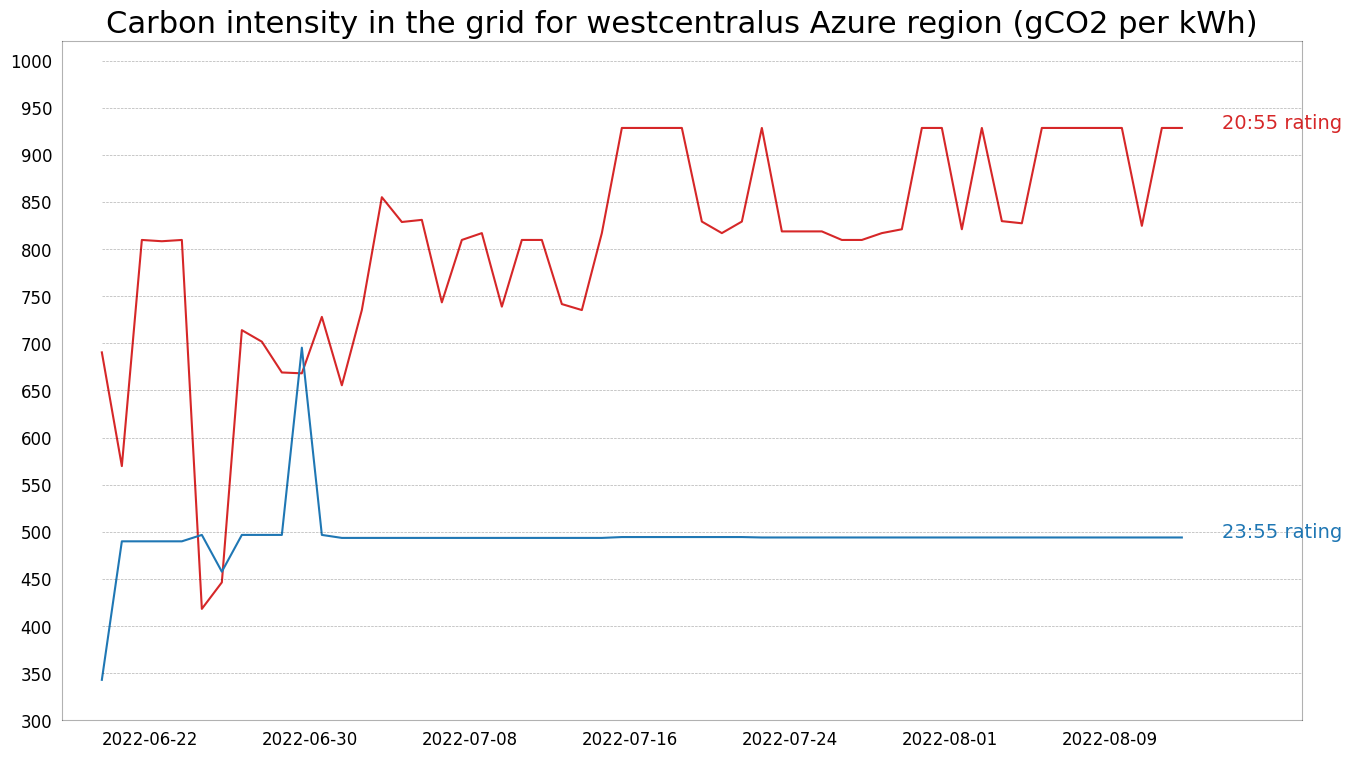

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Data
df = df2#pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')
print(df)

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 300
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 50
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 100)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# Draw Tick lines  
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=60, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Carbon intensity in the grid for westcentralus Azure region (gCO2 per kWh)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 8), df.date.values[::8], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 60)    
plt.show()

